In [9]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from univarfem import IntervalMesh
from univarfem import EllipticFEMSolver

# Elliptic PDE

If we consider the simple elliptic PDE

$$
    -\frac{d}{dx}\left(q(x) \frac{d u(x)}{dx} \right) = f(x)
    \qquad x \in (0, 1) \\
    u(0) = u(1) = 0
$$

with coefficient function, $q(x)$, defined as
$$
q(x) = \frac{3}{2} + \sin\left(\frac{3\pi x}{2} \right)
$$

and discontinuous source function

$$
f(x)
= \begin{cases}
(18x - 6)\frac{3\pi}{2}\cos\left(\frac{3\pi x}{2}\right)
+ 18\left(\frac{3}{2} + \sin\left(\frac{3\pi x}{2}\right)\right)
&\text{for } x \in [0, \frac{1}{3}) \\
0 &\text{for } x \in (\frac{1}{3}, \frac{2}{3}) \\
(18x - 12)\frac{3\pi}{2}\cos\left(\frac{3\pi x}{2}\right)
+ 18\left(\frac{3}{2} + \sin\left(\frac{3\pi x}{2} \right) \right)
&\text{for } x \in [\frac{2}{3}, 1]
\end{cases}
$$

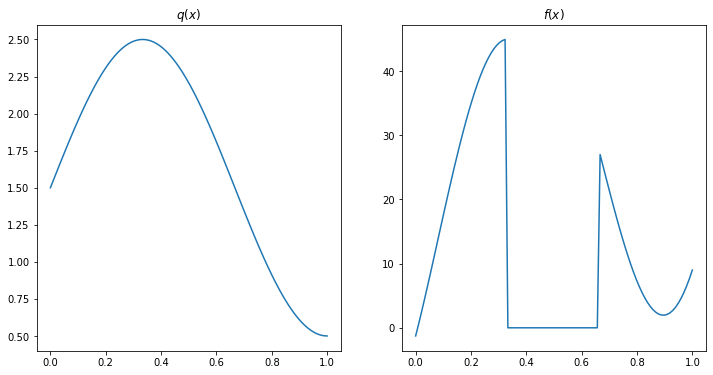

In [52]:
def coeff(x):
    return 1.5 + np.sin(1.5*np.pi*x)

def source(x):
    x = np.atleast_1d(x)
    res = np.zeros(x.shape)
    res[x < 1./3] = ((18*x[x < 1./3] - 6)
                     *1.5*np.pi*np.cos(1.5*np.pi*x[x < 1./3])
                     + 18*(1.5 + np.sin(1.5*np.pi*x[x < 1./3])))
    res[x >= 2/3] = ((18*x[x >= 2/3]- 12)
                     *1.5*np.pi*np.cos(1.5*np.pi*x[x>=2/3])
                     + 18*(1.5 + np.sin(1.5*np.pi*x[x>=2/3])))
    
    return res

fig, ax = plt.subplots(ncols=2, figsize=(12, 6))
xx = np.linspace(0., 1., 100)

ax[0].plot(xx, coeff(xx))
ax[0].set_title(r'$q(x)$')
ax[1].set_title(r'$f(x)$')
ax[1].plot(xx, source(xx))
plt.show()

### Mesh construction

In [59]:
points = np.linspace(0., 1, 25)
mesh = IntervalMesh(points)

fem = EllipticFEMSolver(mesh, coeff, source)
Aq, fq = fem.assemble()
uq = np.linalg.solve(Aq, fq)

### True solution
It can be checked that a true solution to this problem is given by
$$
u(x) = \begin{cases}
-9x^2 + 6x &\text{for } x \in [0, \frac{1}{3}] \\
1 &\text{for } x \in (\frac{1}{3}, \frac{2}{3}] \\
-9x^2 + 12x - 3x &\text{for } x \in (\frac{2}{3}, 1].
\end{cases}
$$

In [60]:
def true_sol(x):
    x = np.atleast_1d(x)
    res = np.ones(x.shape)
    res[x <= 1./3] = -9*x[x <= 1./3]**2 + 6*x[x <= 1./3]
    res[x > 2./3] = -9*x[x > 2./3]**2 + 12*x[x > 2/3] - 3
    return res

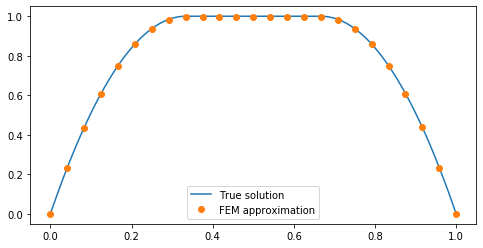

In [61]:
fig, ax = plt.subplots(figsize=(8, 4))
xx = np.linspace(0., 1., 100)

ax.plot(xx, true_sol(xx), 'C0-',
        label='True solution')
ax.plot(mesh.points, uq, 'C1o',
        label='FEM approximation')
ax.legend()
plt.show()